In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the Dataset

In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/SML_Dataset/Copy of Salary_Data.csv")
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values


In [ ]:
x


array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [4]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [5]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)
x.shape

(30, 1)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
y = sc.fit_transform(y)
y


array([[-1.36011263],
       [-1.10552744],
       [-1.419919  ],
       [-1.20495739],
       [-1.33978143],
       [-0.71830716],
       [-0.58815781],
       [-0.79981746],
       [-0.42881019],
       [-0.69801306],
       [-0.47433279],
       [-0.74976858],
       [-0.70662043],
       [-0.70201994],
       [-0.55250402],
       [-0.29921736],
       [-0.37004264],
       [ 0.26285865],
       [ 0.19885989],
       [ 0.66547573],
       [ 0.58377993],
       [ 0.82623317],
       [ 0.93861127],
       [ 1.40274136],
       [ 1.24020308],
       [ 1.09740238],
       [ 1.51986835],
       [ 1.3590738 ],
       [ 1.72102849],
       [ 1.70177321]])

splitting the dataset into the training set and test set

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 1/3, random_state=0)

In [17]:
class SimpleLinearRegression:
  def __init__(self):
    self.m = None
    self.c = None

  def fit(self,x,y):
    N = len(x)

    #calculate the sums
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x*y)
    sum_x2 = np.sum(x**2)

    #calculate slope(m) and Intercept(c)
    self.m = (N*sum_xy - sum_x * sum_y) / (N*sum_x2 - sum_x ** 2)
    self.c = (sum_y-self.m*sum_x)/N

  def predict(self,x):
      return self.m *x +self.c

Training the simple linear regression model on the training set

In [18]:
model = SimpleLinearRegression()
model.fit(x_train, y_train)


predicting the test results

In [19]:
y_pred = model.predict(x_test)


Visualising the Training set results.

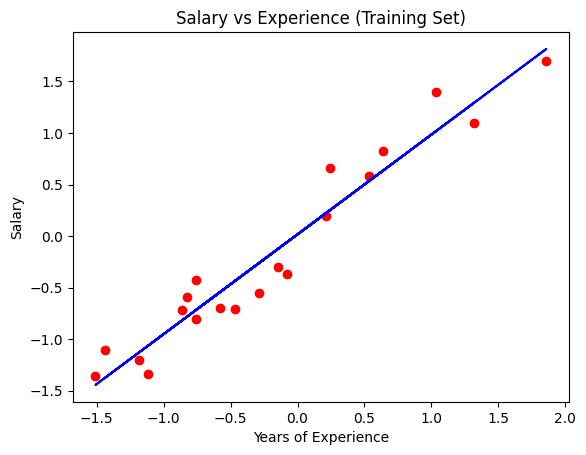

In [20]:
plt.scatter(x_train, y_train, color="red")
plt.plot(x_train, model.predict(x_train), color='blue')
plt.title("Salary vs Experience (Training Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

Visualising the test set results

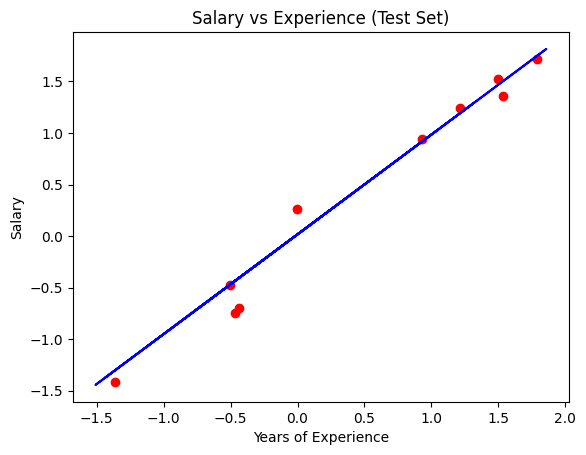

In [21]:
plt.scatter(x_test, y_test, color='red')
plt.plot(x_train, model.predict(x_train), color='blue')
plt.title("Salary vs Experience (Test Set)")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Evaluation Metrics

Mean Squared Error: 0.02894158113711757
R-Squared: 0.9749154407708353
Accuracy: 97.49154407708353


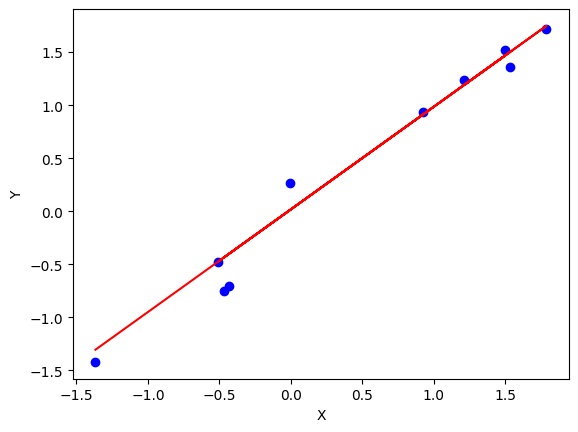

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean square error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

#calculate the R-Squared(Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print(f"R-Squared: {r2}")

#Calculate accuracy as R-Squared
accuracy = r2*100
print(f"Accuracy: {accuracy}")

#plotting the regression line and the data points
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.plot(x_test, y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()